<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
df = pd.read_csv("Lab 9.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,Log_ConvertedCompYearly,ExperienceLevel
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,10.629774,9.378726,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.000000,0.000000,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Expert
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.629774,9.378726,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Expert
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,10.629774,9.378726,Too long,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,10.629774,9.378726,Too short,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
df[["Employment","RemoteWork","JobSat"]].dtypes

Employment     object
RemoteWork     object
JobSat        float64
dtype: object

In [6]:
df[["Employment","RemoteWork","JobSat"]].isnull().sum()

Employment    0
RemoteWork    0
JobSat        0
dtype: int64

In [5]:
df["JobSat"]=df["JobSat"].fillna(df["JobSat"].mean())

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [15]:
df['YearsCodePro'].unique()
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0,'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro']=df['YearsCodePro'].fillna(df['YearsCodePro'].mean())
df['YearsCodePro'].isnull().sum()

np.int64(0)

In [16]:
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [18]:
median_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
median_sat.head()

/tmp/ipykernel_2947/1772432042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


,ExperienceRange,JobSat
0,0-5,6.969466
1,5-10,6.969466
2,10-20,6.969466
3,20+,6.969466


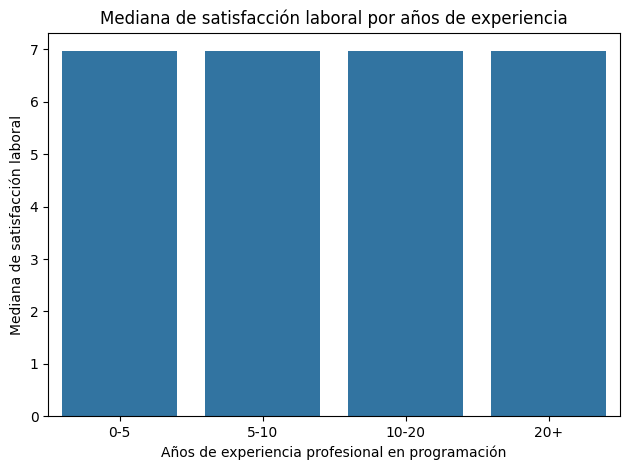

In [20]:
sns.barplot(data = median_sat, x = "ExperienceRange", y = "JobSat")
plt.title("Mediana de satisfacción laboral por años de experiencia")
plt.xlabel("Años de experiencia profesional en programación")
plt.ylabel("Mediana de satisfacción laboral")
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_2947/2485230505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Set2')


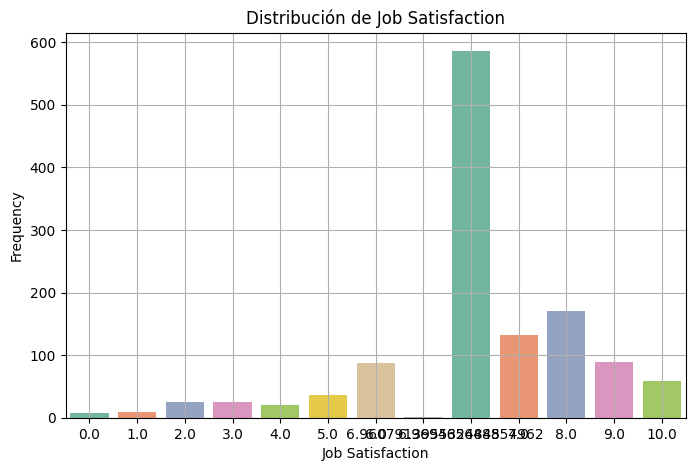

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='Set2')
plt.title("Distribución de Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_2947/2682739791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


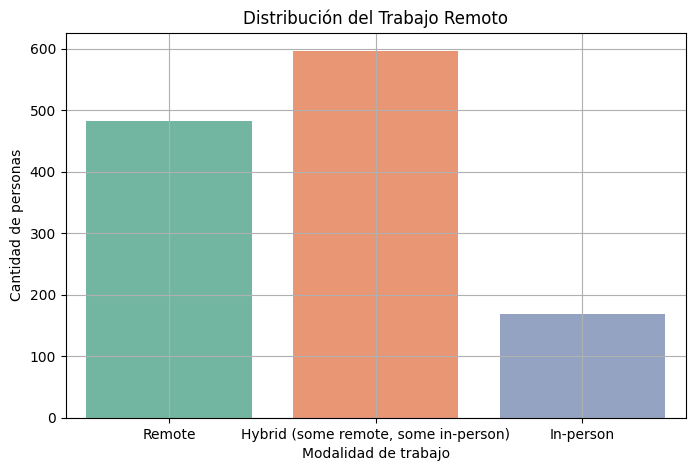

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribución del Trabajo Remoto')
plt.xlabel('Modalidad de trabajo')
plt.ylabel('Cantidad de personas')
plt.grid(True)
plt.show()

In [23]:
remote_vs_employment = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='columns') * 100
remote_vs_employment.round(2)

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, part-time","Employed, part-time",I prefer not to say,...,Retired,"Student, full-time","Student, full-time;Employed, part-time","Student, full-time;Independent contractor, freelancer, or self-employed","Student, full-time;Not employed, and not looking for work","Student, full-time;Not employed, but looking for work","Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Student, full-time;Not employed, but looking for work;Not employed, and not looking for work","Student, part-time","Student, part-time;Employed, part-time"
RemoteWork,,,,,,,,,,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",40.63,50.0,34.92,50.0,0.0,15.38,100.0,50.00,50.0,100.0,...,100.0,100.0,83.33,33.33,100.0,100.0,50.0,100.0,100.0,28.57
In-person,18.47,0.0,7.94,0.0,0.0,61.54,0.0,8.33,25.0,0.0,...,0.0,0.0,8.33,0.00,0.0,0.0,0.0,0.0,0.0,28.57
Remote,40.90,50.0,57.14,50.0,100.0,23.08,0.0,41.67,25.0,0.0,...,0.0,0.0,8.33,66.67,0.0,0.0,50.0,0.0,0.0,42.86


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [24]:
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

lang_by_country = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

sorted_df = lang_by_country.sort_values(by='Count', ascending=False)

top_countries = sorted_df['Country'].value_counts().head(10).index.tolist()

filtered = sorted_df[sorted_df['Country'].isin(top_countries)]
top_languages = filtered['LanguageHaveWorkedWith'].value_counts().head(5).index.tolist()

grouped = filtered[filtered['LanguageHaveWorkedWith'].isin(top_languages)]

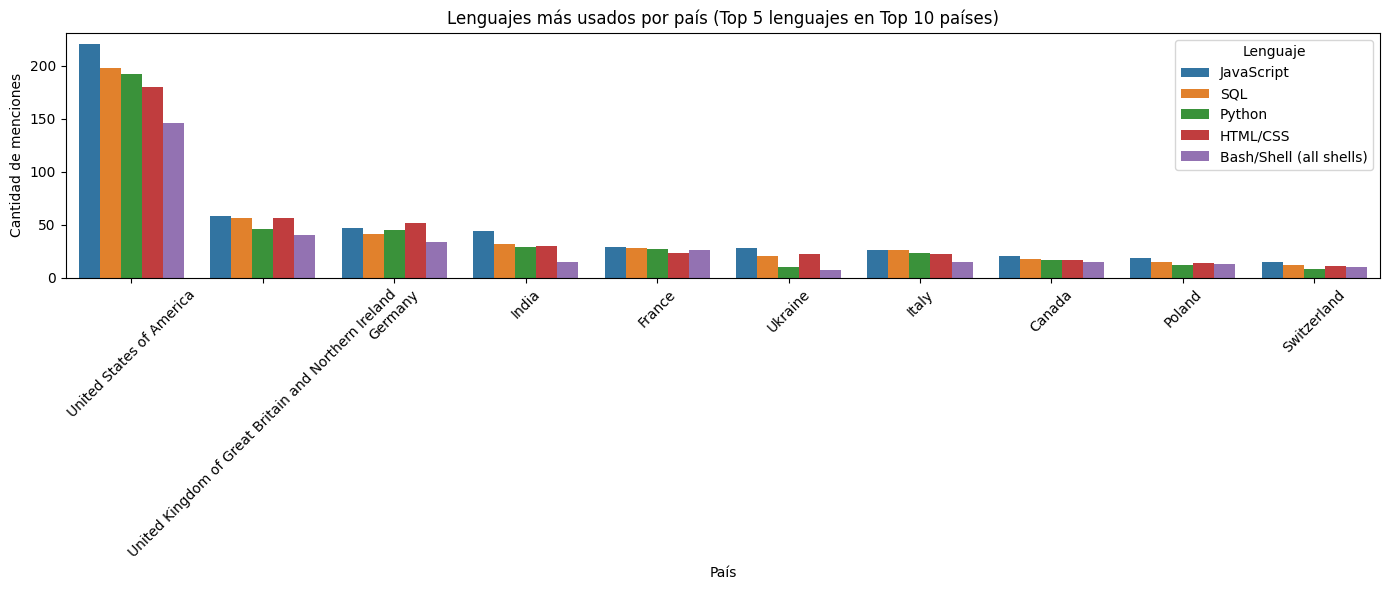

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Country', y='Count', hue='LanguageHaveWorkedWith')
plt.title('Lenguajes más usados por país (Top 5 lenguajes en Top 10 países)')
plt.xlabel('País')
plt.ylabel('Cantidad de menciones')
plt.legend(title='Lenguaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


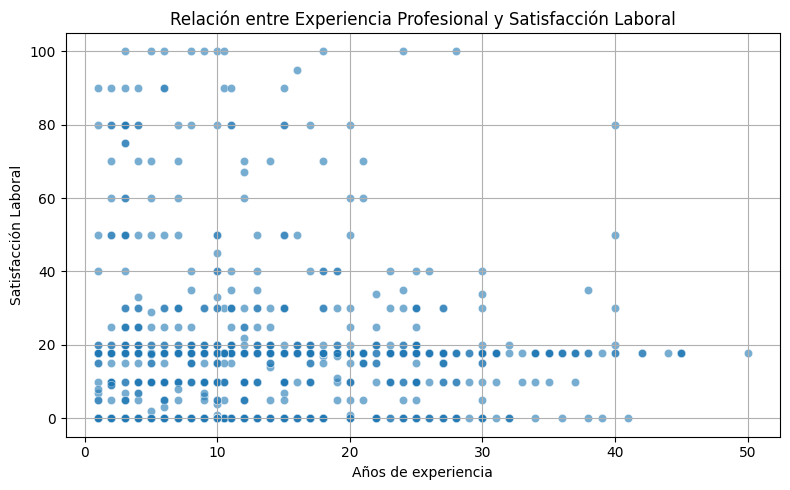

In [27]:
df["JobSatPoints_1"] = df["JobSatPoints_1"].fillna(df["JobSatPoints_1"].mean())
z_df = df[["YearsCodePro","JobSatPoints_1"]]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=z_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)
plt.title('Relación entre Experiencia Profesional y Satisfacción Laboral')
plt.xlabel('Años de experiencia')
plt.ylabel('Satisfacción Laboral')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [29]:
df["Employment"].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [31]:
mapeo_empleo = {
    'Employed, full-time': 'Full time',
    'Student, full-time' : 'Full time',
    'Student, full-time;Not employed, but looking for work' : 'Not employed, but looking for work',
    'Independent contractor, freelancer, or self-employed' : 'Independent/Freelancer',
    'Not employed, and not looking for work' : 'Not employed, and not looking for work',
    'Employed, full-time;Student, part-time' : 'Full time',
    'Employed, full-time;Independent contractor, freelancer, or self-employed' : 'Full time',
    'Employed, full-time;Student, full-time' : 'Full time',
    'Employed, part-time' : "Part time",
    'Student, full-time;Employed, part-time' : "Part time",
    'Student, part-time;Employed, part-time' : "Part time",
    'I prefer not to say' : 'I prefer not to say',
    'Not employed, but looking for work' : 'Not employed, but looking for work',
    'Student, part-time' : 'I prefer not to say',
    'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time' :  'Full time',
    'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time' :  'Full time',
    'Independent contractor, freelancer, or self-employed;Employed, part-time' : 'Independent/Freelancer',
    'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time' : 'Independent/Freelancer',
    'Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed' : 'Not employed, but looking for work',
    'Student, full-time;Independent contractor, freelancer, or self-employed' : 'Independent/Freelancer',
    'Employed, full-time;Employed, part-time' : 'Full time',
    'Not employed, but looking for work;Independent contractor, freelancer, or self-employed' : 'Not employed, but looking for work',
    'Student, full-time;Not employed, and not looking for work' : 'Not employed, and not looking for work',
    "Retired" : "Retired",
    'Independent contractor, freelancer, or self-employed;Student, part-time' : 'Independent/Freelancer',
    'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time' : 'Full time',
    'Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time' : 'Not employed, but looking for work',
    'Not employed, but looking for work;Student, part-time' : 'Not employed, but looking for work',
    'Not employed, but looking for work;Not employed, and not looking for work' : 'Not employed, but looking for work',
    'Independent contractor, freelancer, or self-employed;Retired' : "Retired",
    'Not employed, but looking for work;Student, part-time;Employed, part-time' : 'Not employed, but looking for work',
    'Student, full-time;Not employed, but looking for work;Not employed, and not looking for work' : 'Not employed, but looking for work'
}

In [32]:
df['TipoEmpleoAgrupado'] = df['Employment'].map(mapeo_empleo)

In [34]:
tabla = pd.crosstab(df['EdLevel'], df['TipoEmpleoAgrupado'], normalize='index')
tabla

TipoEmpleoAgrupado,Full time,I prefer not to say,Independent/Freelancer,"Not employed, and not looking for work","Not employed, but looking for work",Part time,Retired
EdLevel,,,,,,,
"Associate degree (A.A., A.S., etc.)",0.900000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.791165,0.006024,0.088353,0.014056,0.066265,0.020080,0.014056
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.759878,0.009119,0.133739,0.009119,0.051672,0.024316,0.012158
Primary/elementary school,0.521739,0.086957,0.000000,0.260870,0.130435,0.000000,0.000000
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",0.705128,0.012821,0.115385,0.000000,0.025641,0.051282,0.089744
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.579439,0.074766,0.130841,0.046729,0.093458,0.074766,0.000000
Some college/university study without earning a degree,0.679012,0.024691,0.185185,0.012346,0.067901,0.030864,0.000000
Something else,0.333333,0.190476,0.238095,0.142857,0.095238,0.000000,0.000000


/tmp/ipykernel_2947/1711515564.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


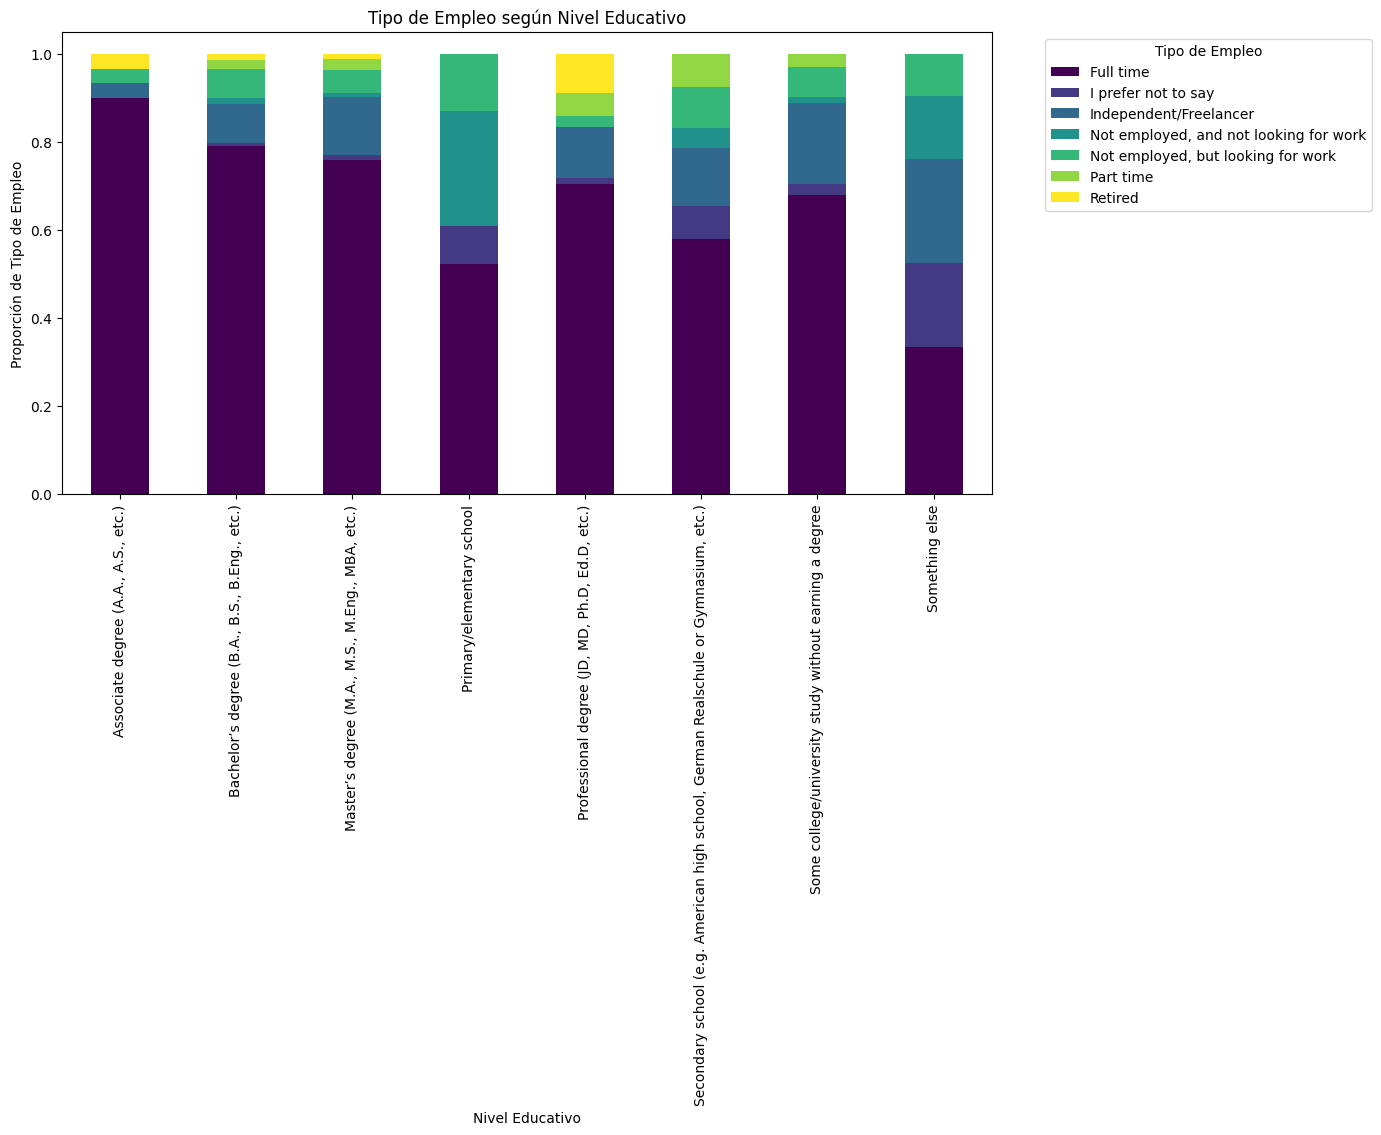

In [35]:
tabla.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title('Tipo de Empleo según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Tipo de Empleo')
plt.legend(title='Tipo de Empleo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [36]:
df.to_csv("Lab 10.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
